# Ridge & Lasso Regression Programming Assignment 

In [22]:
# Run the code cell below
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn import linear_model
import sklearn.model_selection
from sklearn.metrics import mean_squared_error
% matplotlib inline

# Data Import
Import the data from the file College.csv

In [123]:
df = pd.read_csv("College.csv")

# Convert df into a numpy array using df.values
data = df.values
# Below code drops first 2 columns and selects the rest of the columns
data1 = data[:,2:19]
# Store Values of all Rows of Columns 0:16 in X and Values of last column in Y from data1 
X = data1[:, :16]
Y = data1[:,-1]


print(np.shape(X))
print(np.shape(Y))

(777, 16)
(777,)


# Splitting Data Into Training And Test Set.
Take first 390 rows as training set and the remaining rows as test set.

In [124]:
X_tr = X[:390] 
Y_tr = Y[:390]
X_test = X[390:] 
Y_test = Y[390:]

print(np.shape(X_tr))
print(np.shape(Y_tr))
print(np.shape(X_test))
print(np.shape(Y_test))

(390, 16)
(390,)
(387, 16)
(387,)


# Fitting Linear Model
In the below code cell, fit a linear model and print the testset error. You can use sklearn's linear_model to find the fit.

In [125]:
# Linear Model
model = linear_model.LinearRegression()
model.fit(X_tr, Y_tr)
y_pred = model.predict(X_test)

print("The test MSE: ",mean_squared_error(Y_test, y_pred)) 


The test MSE:  183.36744206005102


# Ridge Regression
In the below code cell, fit a ridge model using linear_model.ridge(warm_start=True, fit_intercept = True). The alphas variable contaings 100 values of regularization parameter. Fit 100 models with these 100 different values of alphas and find test errors for all these 100 models and plot test error v/s alpha.
Note: In lecture, we used the letter lambda for regularization but in sklearn, they use alpha. So, in this programming assignment, we prefer to use alpha for the regularization parameter. 

In [157]:
# Ridge Model
model = linear_model.Ridge(fit_intercept = True, normalize = True)
# The code below 
nalpha = 100
alphas = np.logspace(-3,1,nalpha)

coefs = []  
mse = []

# Write code for finding costs for all the 100 models. YOu may use a for loop for this. 
for a in alphas:
    model.set_params(alpha = a) 
    model.fit(X_tr, Y_tr) 
    coefs.append(model.coef_) 
    mse.append(mean_squared_error(Y_test, model.predict(X_test)))
    
print(np.shape(coefs)) # This line just checks to make sure things probably worked
print(np.shape(mse))   

(100, 16)
(100,)


# Plotting Test Error v/s Alphas
Write code to plot test errors v/s alphas in the code cell below.

Text(0,0.5,'mse')

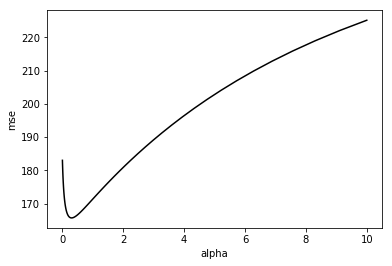

In [158]:
# Write the code below
ax = plt.gca()
ax.plot(alphas, mse, 'k') 
plt.xlabel('alpha')
plt.ylabel('mse')

# Lasso Regression
In the below code cell, fit a lasso model using linear_model.Lasso(warm_start=True, fit_intercept = True). The alphas variable contaings 100 values of regularization parameter. Fit 100 models with these 100 different values of alphas and find test errors for all these 100 models and plot test error v/s alpha.
Note: In lecture, we used the letter lambda for regularization but in sklearn, they use alpha. So, in this programming assignment, we prefer to use alpha for the regularization parameter. 

Text(0,0.5,'weights')

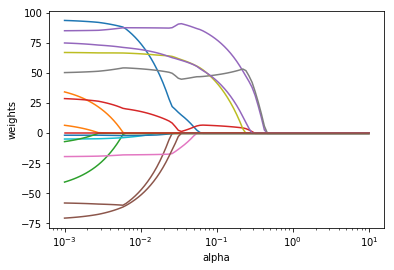

In [151]:
# Lasso Model
model = linear_model.Lasso(warm_start=True, fit_intercept = True, normalize = True)
# The code below 
nalpha = 100
alphas = np.logspace(-3,1,nalpha)
# Write code for finding costs for all the 100 models. YOu may use a for loop for this. 
coefs = []
mse = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_tr, Y_tr)
    coefs.append(model.coef_)
    mse.append(mean_squared_error(Y_test, model.predict(X_test)))
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')


# Plotting Test Error v/s Alphas
Write code to plot test errors v/s alphas in the code cell below.

Text(0,0.5,'mse')

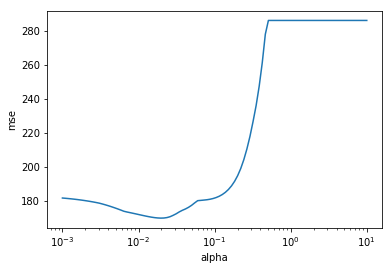

In [152]:
# Write the code below
ax = plt.gca()
ax.plot(alphas, mse)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('mse')

# Number of Non-Zero Coefficients:
Find the number of Non-Zero Coefficients in the model you select.

In [153]:
# Write the code below
print(model.coef_)
print(np.count_nonzero(model.coef_))

[ 0.  0.  0.  0.  0. -0. -0.  0.  0.  0. -0.  0.  0. -0.  0.  0.]
0
